In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [2]:
con = sqlite3.connect("default.db")

In [3]:
cur = con.cursor()

In [4]:
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]

In [5]:
print(table_list)

[('sinr',), ('ueTxPower',), ('slotStats',), ('rbStats',), ('gnbRxPower',), ('e2e',)]


In [6]:
con.close()

In [5]:
# cnx = sqlite3.connect('file.db')

df1 = pd.read_sql_query("SELECT * FROM sinr", con)
df2 = pd.read_sql_query("SELECT * FROM ueTxPower", con)
df3 = pd.read_sql_query("SELECT * FROM slotStats", con)
df4 = pd.read_sql_query("SELECT * FROM rbStats", con)
df5 = pd.read_sql_query("SELECT * FROM gnbRxPower", con)
df6 = pd.read_sql_query("SELECT * FROM e2e", con)

In [7]:
df1.head()

,CellId,BwpId,Rnti,AvgSinr,Seed,Run
0,78,0,1,8908.413775,1,1
1,110,0,1,1584.186600,1,1
2,78,0,1,8908.413775,1,1
3,110,0,1,1584.186600,1,1
4,78,0,1,4757.686693,1,1


In [8]:
len(df1)

39239

In [9]:
df1['CellId'].unique()

array([ 78, 110, 112,  34,  90, 100, 104,  14,  20,  12,  18,  30,  82,
        16,  28, 114,  22,  32,  36, 106,  86,  10,  96,  24, 108,   6,
         4,   2,  98, 102,  80,  94,  26,  88,  38,  84,   8,  92])

In [10]:
df1['Rnti'].unique()

array([1])

In [11]:
df1['CellId'][df1['AvgSinr'].idxmax()]

78

In [12]:
df11 = (df1.groupby(['CellId']).mean())/10

In [13]:
df11.head()

,BwpId,Rnti,AvgSinr,Seed,Run
CellId,,,,,
2,0.0,0.1,0.387900,0.1,0.1
4,0.0,0.1,3.404279,0.1,0.1
6,0.0,0.1,0.952365,0.1,0.1
8,0.0,0.1,4.995754,0.1,0.1
10,0.0,0.1,0.913506,0.1,0.1


In [14]:
for i in df11['AvgSinr']:    
    if (i >= 20):
        print("Excellent Signal to Noise Ratio")
    elif (i > 13) and (i < 20):
        print("Good Signal to Noise Ratio")
    elif (i > 0) and (i < 13):
        print("Midum Signal to Noise Ratio")
    else:
        print("weak Signal to Noise Ratio")

Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Noise Ratio
Midum Signal to Nois

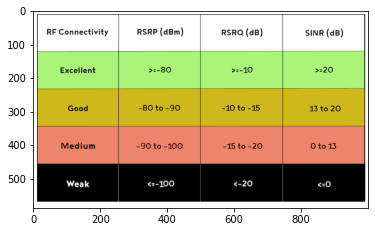

In [6]:
im = plt.imread('snr_standard.png')
plt.imshow(im)

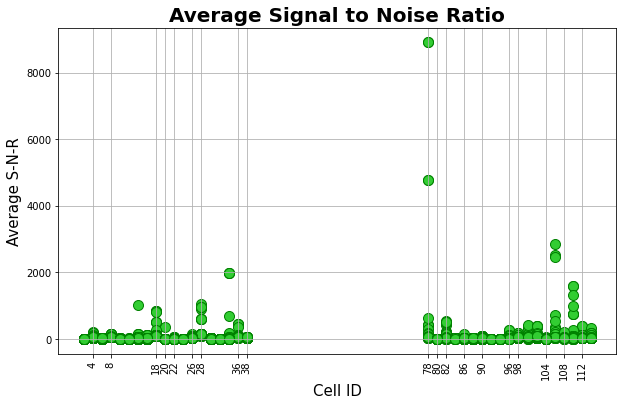

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.scatter(df1['CellId'], df1['AvgSinr'], marker='.', c='limegreen', s=400, edgecolor='green')

ax.set_title("Average Signal to Noise Ratio", fontsize=20, fontweight='bold')
ax.set_xlabel("Cell ID", fontsize=15)
ax.set_ylabel("Average S-N-R", fontsize=15)

ax.set_xticks(ticks=df1['CellId'].unique(), labels=df1['CellId'].unique(), rotation=90)
ax.set_xticks(ax.get_xticks()[::2])

ax.grid()
plt.savefig("SNR.png")
plt.show()

In [167]:
#IMSI: International Mobile Subscriber Identitiy.
#This refers to a unique number for identifying a mobile subscriber.

#RNTI: Radio Network Temporary Identifier. 
#RNTIs are used to differentiate/identify a connected UE in the cell.

#BWPID: Bandwidth Part. 
#part of the total channel bandwidth configured for a cell that is 
#used for a UE at a specific moment of operation.

#Tx/Rx rate – displays the transmit/receive data rates (in Mbps).

#Tx power indicates the device's worst-case transmit power.
#the device is guaranteed to provide at least that much power.

#RB: Resource Block

df2.head()

,Frame,SubFrame,Slot,Rnti,Imsi,BwpId,CellId,txPowerRb,txPowerTotal,rbNumActive,rbNumTotal,Seed,Run
0,1,7,0,0,1,0,2,0.000937,0.199526,213,213,1,1
1,1,7,0,0,2,0,4,0.000937,0.199526,213,213,1,1
2,1,7,0,0,3,0,6,0.000937,0.199526,213,213,1,1
3,1,7,0,0,4,0,8,0.000937,0.199526,213,213,1,1
4,1,7,0,0,5,0,10,0.000937,0.199526,213,213,1,1


In [27]:
len(df2)

39267

In [26]:
df2['Frame'].unique()

array([  1,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [28]:
df2['SubFrame'].unique()

array([7, 5, 6, 8, 9, 0, 1, 2, 3, 4])

In [30]:
df2['Slot'].unique()

array([0])

In [32]:
df2['Rnti'].unique()

array([0, 1])

In [31]:
df2['Imsi'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114])

In [33]:
df2['BwpId'].unique()

array([0])

In [34]:
df2['CellId'].unique()

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  78,  80,  82,  84,  86,  88,  90,
        92,  94,  96,  98, 100, 102, 104, 106, 108, 110, 112, 114])

In [35]:
df2['txPowerRb'].min()

0.0009367428708774095

In [36]:
df2['txPowerRb'].max()

0.0009367428708774095

In [37]:
df2['txPowerRb'].unique()

array([0.00093674])

In [38]:
df2['txPowerTotal'].unique()

array([0.19952623])

In [39]:
df2['rbNumActive'].unique()

array([213])

In [168]:
dff = df2[df2['CellId']==2].filter(items=['Imsi'])

In [66]:
dff['Imsi'].unique()

array([1])

In [71]:
print (df2.groupby('CellId')['Imsi'].nunique())

CellId
2      1
4      1
6      1
8      1
10     1
12     1
14     1
16     1
18     1
20     1
22     1
24     1
26     1
28     1
30     1
32     1
34     1
36     1
38     1
78     1
80     1
82     1
84     1
86     1
88     1
90     1
92     1
94     1
96     1
98     1
100    1
102    1
104    1
106    1
108    1
110    1
112    1
114    1
Name: Imsi, dtype: int64


In [169]:
df2_new = df2.drop(columns=['Frame', 'SubFrame', 'Slot', 'Rnti', 'BwpId', 'txPowerRb', 'txPowerTotal', 
                           'rbNumActive', 'Seed', 'Run', 'rbNumTotal'])

In [170]:
df2_new.head()

,Imsi,CellId
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [171]:
table = df2_new.CellId.groupby([df2_new.Imsi, df2_new.CellId]).count().unstack().fillna(0).astype(int)

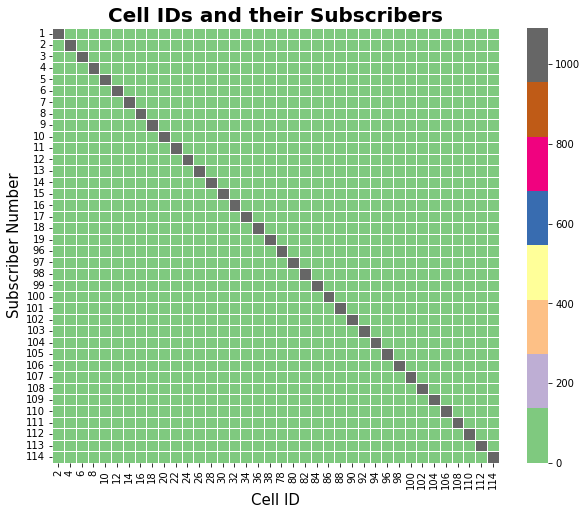

In [173]:
fig, ax=plt.subplots()
fig.set_size_inches(10,8)

sns.heatmap(table, linewidth=0.5, xticklabels=True, yticklabels=True, cmap='Accent')

ax.set_title("Cell IDs and their Subscribers", fontsize=20, fontweight='bold')
ax.set_xlabel("Cell ID", fontsize=15)
ax.set_ylabel("Subscriber Number", fontsize=15)

plt.savefig("CellId-Imsi")
plt.show()

In [127]:
#CORESET is a region (combination of Time & Frequency resources) on the resource grid 
#where PDCCH resources are located. 
#Min unit of a CORESET is REG (Resource element group) , 
#1 REG = 12 SC's on Freq Domain and Min 1 OFDM Symbol on Time Domain, i.e 1 REG = 1PRB.

df3.head()

,Frame,SubFrame,Slot,BwpId,CellId,ScheduledUe,UsedReg,UsedSym,AvailableRb,AvailableSym,Seed,Run
0,0,0,0,0,2,0,0,0,213,13,1,1
1,0,0,0,0,4,0,0,0,213,13,1,1
2,0,0,0,0,6,0,0,0,213,13,1,1
3,0,0,0,0,8,0,0,0,213,13,1,1
4,0,0,0,0,10,0,0,0,213,13,1,1


In [174]:
len(df3)

85329

In [128]:
df3['Frame'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [132]:
df3['SubFrame'].unique()

array([0, 2, 3, 4, 5, 6, 7, 8, 9, 1])

In [133]:
df3['Slot'].unique()

array([0])

In [134]:
df3['BwpId'].unique()

array([0])

In [135]:
df3['CellId'].unique()

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 114])

In [136]:
df3['ScheduledUe'].unique()

array([0, 1])

In [137]:
df3['UsedReg'].unique()

array([   0, 2556, 1008,  516,  612, 2244,  684, 1368, 1140, 1152, 2280,
        840,  972, 1296, 2472,  552, 1608, 1536, 2016, 1740,  744, 2520,
       1308, 1476, 2340, 1440, 1968, 1572, 2196, 1680, 1116, 2148, 1716,
       2160, 1092, 1044, 1284, 2292, 2052, 1920, 2484, 1704, 2544, 2448,
         36,  756, 1080])

In [138]:
df3['UsedSym'].unique()

array([ 0, 12])

In [139]:
df3['AvailableRb'].unique()

array([213])

In [140]:
df3['AvailableSym'].unique()

array([13, 12])

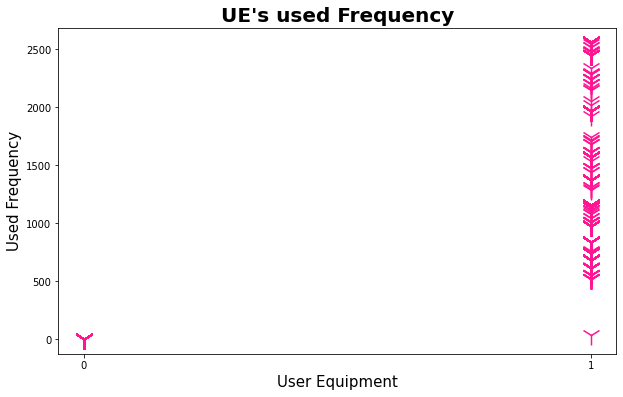

In [178]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.scatter(df3['ScheduledUe'], df3['UsedReg'], marker='1', c='deeppink', s=400)

ax.set_title("UE's used Frequency", fontsize=20, fontweight='bold')
ax.set_xlabel("User Equipment", fontsize=15)
ax.set_ylabel("Used Frequency", fontsize=15)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig("UE-Reg.png")
plt.show()

In [9]:
df4.head()

,Frame,SubFrame,Slot,Symbol,RBIndexActive,BwpId,CellId,Seed,Run
0,40,3,0,1,0,0,78,1,1
1,40,3,0,1,1,0,78,1,1
2,40,3,0,1,2,0,78,1,1
3,40,3,0,1,3,0,78,1,1
4,40,3,0,1,4,0,78,1,1


In [149]:
len(df4)

6374649

In [150]:
df4['Symbol'].unique()

array([1])

In [151]:
df4['RBIndexActive'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [152]:
df4['BwpId'].unique()

array([0])

In [153]:
df4['CellId'].unique()

array([ 78, 110, 112,  34,  90, 100, 104,  14,  20,  12,  18,  30,  82,
        16,  28, 114,  22,  32,  36, 106,  86,  10,  96,  24, 108,   6,
         4,   2,  98, 102,  80,  94,  26,  88,  38,  84,   8,  92])

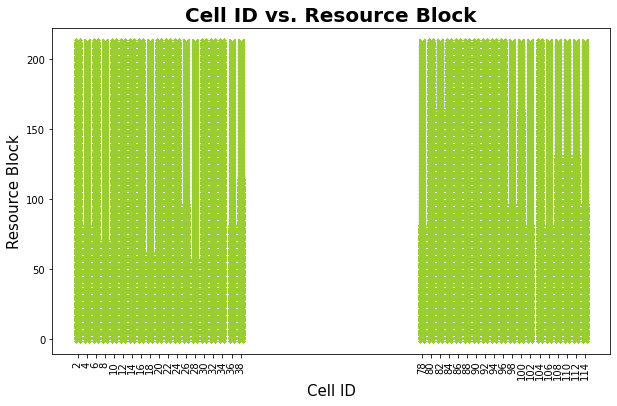

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.scatter(df4['CellId'], df4['RBIndexActive'], marker='x', c='yellowgreen')

ax.set_xticks(ticks=df4['CellId'].unique(), labels=df4['CellId'].unique(), rotation=90)

ax.set_xlabel("Cell ID", fontsize=15)
ax.set_ylabel("Resource Block", fontsize=15)
ax.set_title("Cell ID vs. Resource Block", fontsize=20, fontweight='bold')

plt.savefig("CellId-RB")
plt.show()

In [7]:
df5.head()

,Frame,SubFrame,Slot,Rnti,Imsi,BwpId,CellId,txPowerRb,txPowerTotal,rbNumActive,rbNumTotal,Seed,Run


In [8]:
#Maximum Throughput is the maximum rate at which data can be transmitted 
#through the network connection at given layer of OSI stack. 
#Jitter is the variation in time delay between when a signal is transmitted 
#3and when it's received over a network connection, measuring the variability in ping. 
#This is often caused by network congestion, poor hardware performance and 
#not implementing packet prioritization.

df6.head()

,FlowId,TxPackets,TxBytes,TxOfferedMbps,RxBytes,ThroughputMbps,MeanDelayMs,MeanJitterMs,RxPackets,SEED,RUN
0,3,5000,5140000,41.128226,5140000,41.128226,3.725163,0.320600,5000,1,1
1,4,5000,5140000,41.128226,5070096,40.568882,22.192837,0.335158,4932,1,1
2,10,5000,5140000,41.128226,5140000,41.128226,3.700363,0.320200,5000,1,1
3,11,5000,5140000,41.128226,3315300,26.527706,228.444005,0.413023,3225,1,1
4,14,5000,5140000,41.128226,3474640,27.802681,241.978859,0.406036,3380,1,1


In [14]:
len(df6)

38

In [15]:
df6['FlowId'].unique()

array([  3,   4,  10,  11,  14,  15,  16,  19,  20,  23,  24,  25,  33,
        34,  38,  40,  47,  48,  55,  58,  64,  66,  74,  76,  79,  80,
        83,  85,  88,  89,  95, 101, 102, 105, 106, 107, 108, 113])

In [16]:
df6['TxPackets'].unique()

array([5000])

In [17]:
df6['TxBytes'].unique()

array([5140000])

In [18]:
df6['TxOfferedMbps'].unique()

array([41.12822565, 41.12822565])

In [19]:
df6['RxBytes'].unique()

array([5140000, 5070096, 3315300, 3474640, 5129720,  613716, 5114300,
       1561532,  249804, 3322496,  873800, 3608280, 3302964, 3255676,
       3658652, 1393968, 3227920,  428676, 1707508, 1372380])

In [38]:
df6['ThroughputMbps'].unique()

array([41.12822565, 40.56888178, 26.52770554, 27.80268054, 41.04596919,
        4.91071014, 40.92258452, 12.49475495,  1.99883177, 41.12822565,
       26.58528506,  6.99179836, 28.8720144 , 26.4289978 , 40.92258452,
       26.05061812, 29.27507101, 11.15397479, 25.82852571,  3.43009402,
       13.66279656, 10.98123625])

In [73]:
df6['MeanDelayMs'].unique()

array([  3.725163  ,  22.19283713,   3.700363  , 228.44400486,
       241.97885886,   8.78708003, 361.91935027,  74.23278411,
       443.21276313, 559.2195095 ,   3.648163  ,   9.247563  ,
         3.892563  ,   7.398763  ,   3.648763  ,   3.787963  ,
       218.22311746, 460.23915124,   3.649163  ,   3.706763  ,
       250.00503024, 213.4675297 ,  15.64203034, 221.69853458,
         3.774163  , 234.68992855,   3.650763  , 398.98873999,
         3.714963  ,   3.719963  , 219.87792606, 492.17436636,
         3.700763  , 458.38858708,   3.662963  ,   6.655963  ,
       396.74017349])

In [101]:
df6['MeanJitterMs'].unique()

array([0.3206    , 0.33515815, 0.3202    , 0.41302326, 0.4060355 ,
       0.32853707, 1.7678392 , 0.3359598 , 0.65306122, 4.27736626,
       0.3198    , 0.32068   , 0.32196   , 0.338     , 0.32028   ,
       0.40123762, 1.104     , 0.32036   , 0.39356125, 0.40018674,
       0.32832161, 0.40145248, 0.321     , 0.37892666, 0.66784661,
       0.40146497, 2.32565947, 0.57965081, 0.31992   , 0.66786517])

In [111]:
df6['RxPackets'].unique()

array([5000, 4932, 3225, 3380, 4990,  597, 4975, 1519,  243, 3232,  850,
       3510, 3213, 3167, 3559, 1356, 3140,  417, 1661, 1335])

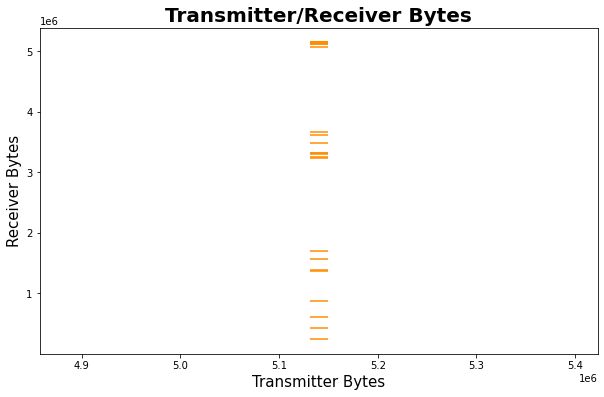

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.scatter(df6['TxBytes'], df6['RxBytes'], marker='_', s=300, c='darkorange')

ax.set_title("Transmitter/Receiver Bytes", fontsize=20, fontweight='bold')
ax.set_xlabel("Transmitter Bytes", fontsize=15)
ax.set_ylabel("Receiver Bytes", fontsize=15)

plt.savefig("Transmitter-Receiver-Bytes.png")
plt.show()

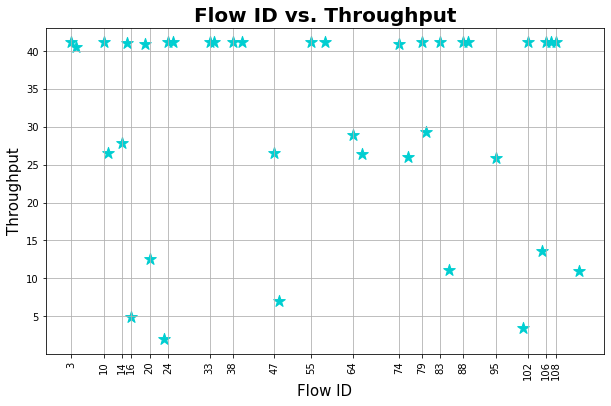

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.scatter(df6['FlowId'], df6['ThroughputMbps'], marker='*', c='darkturquoise', s=150)

ax.set_title("Flow ID vs. Throughput", fontsize=20, fontweight='bold')
ax.set_xlabel("Flow ID", fontsize=15)
ax.set_ylabel("Throughput", fontsize=15)

ax.set_xticks(ticks=df6['FlowId'].unique(), labels=df6['FlowId'].unique(), rotation=90)
# plt.setp(ax.get_xticklabels(), rotation=270, horizontalalignment='right')
# plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
ax.set_xticks(ax.get_xticks()[::2])

plt.grid()
plt.savefig("FlowId-Throughput.png")
plt.show()

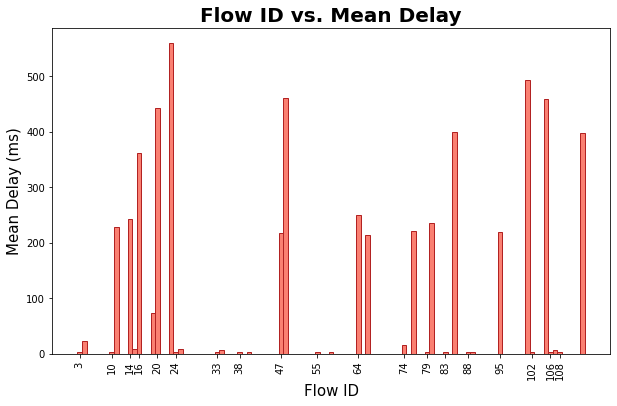

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.bar(df6['FlowId'], df6['MeanDelayMs'], width=1, color='salmon', edgecolor='firebrick')

ax.set_title("Flow ID vs. Mean Delay", fontsize=20, fontweight='bold')
ax.set_xlabel("Flow ID", fontsize=15)
ax.set_ylabel("Mean Delay (ms)", fontsize=15)

ax.set_xticks(ticks=df6['FlowId'].unique(), labels=df6['FlowId'].unique(), rotation=90)
ax.set_xticks(ax.get_xticks()[::2])

plt.savefig("FlowId-MeanDelay.png")
plt.show()

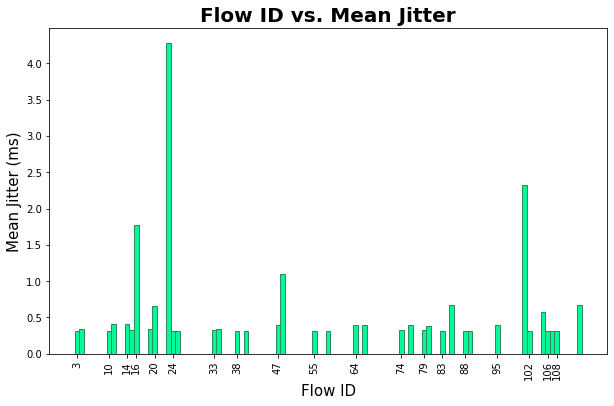

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.bar(df6['FlowId'], df6['MeanJitterMs'], width=1, color='mediumspringgreen', edgecolor='seagreen')

ax.set_title("Flow ID vs. Mean Jitter", fontsize=20, fontweight='bold')
ax.set_xlabel("Flow ID", fontsize=15)
ax.set_ylabel("Mean Jitter (ms)", fontsize=15)

ax.set_xticks(ticks=df6['FlowId'].unique(), labels=df6['FlowId'].unique(), rotation=90)
ax.set_xticks(ax.get_xticks()[::2])

plt.savefig("FlowId-MeanJitter.png")
plt.show()

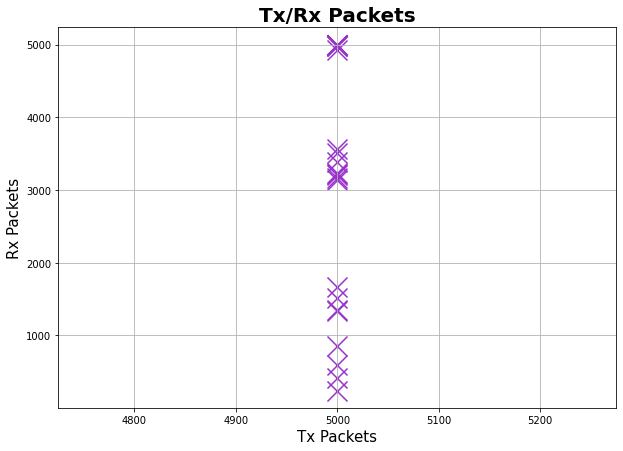

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

ax.scatter(df6['TxPackets'], df6['RxPackets'], marker='x', s=400, c='darkorchid')

ax.set_title("Tx/Rx Packets", fontsize=20, fontweight='bold')
ax.set_xlabel("Tx Packets", fontsize=15)
ax.set_ylabel("Rx Packets", fontsize=15)

plt.grid()
plt.savefig("TxRx-Packets.png")
plt.show()